In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

table_size1: 396


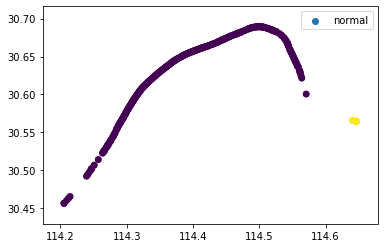

abnormal: []
table_size2: 396
Abnormal points number: 0


In [2]:
COLUMNS = ['date','time','ID','longitude','latitude',
           'longitude_last','latitude_last','v','direct','examine']
table = pd.read_csv('DATA/20161017 (1).txt', header = None, delim_whitespace=True, names = COLUMNS)
table_size1 = table.shape[0]
print('table_size1: %d' %table_size1)
#table.plot.scatter(x = 'longitude', y= 'latitude')
#plt.show()

X = table[['longitude','latitude']]
X = StandardScaler().fit_transform(X)
labels = DBSCAN(eps= 0.6).fit_predict(X)

plt.figure()
plt.scatter(table['longitude'].values, table['latitude'].values, c = labels)
#plt.savefig('result3.jpg')
plt.legend(['normal','abnormal'])
plt.show()

abnormal = np.argwhere(labels == -1).squeeze()
print('abnormal:' ,abnormal)
table = table.drop(index= abnormal)
table = table.reset_index(drop = True)

table_size2 = table.shape[0]
print('table_size2: %d' %table_size2)
print('Abnormal points number: %d' %(table_size1 - table_size2))

In [3]:
for i in range(len(table)):
    h,m,s = list(map(int, table['time'][i].split(':')))
    table['time'][i] = 3600 * h + 60*m + s

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
table_save = table[['time','longitude','latitude']]
table_save.head()

,time,longitude,latitude
0,11253,114.205147,30.456370
1,11288,114.205733,30.456913
2,11455,114.209440,30.460460
3,11593,114.212027,30.462997
4,11702,114.214507,30.465450


In [5]:
table_save.to_excel('qs1/DBSCAN_1.xlsx')